In [1]:
import numpy as np
import pandas as pd

In [30]:
df = pd.read_excel('F:\\AIEC\\MLL\\Assignment 7-20250408T052824Z-001\\Assignment 7\\Pumpkin_Seeds_Dataset.xlsx')

In [31]:
df.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,Çerçevelik
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,Çerçevelik
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,Çerçevelik
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,Çerçevelik
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,Çerçevelik


In [32]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               2500 non-null   int64  
 1   Perimeter          2500 non-null   float64
 2   Major_Axis_Length  2500 non-null   float64
 3   Minor_Axis_Length  2500 non-null   float64
 4   Convex_Area        2500 non-null   int64  
 5   Equiv_Diameter     2500 non-null   float64
 6   Eccentricity       2500 non-null   float64
 7   Solidity           2500 non-null   float64
 8   Extent             2500 non-null   float64
 9   Roundness          2500 non-null   float64
 10  Aspect_Ration      2500 non-null   float64
 11  Compactness        2500 non-null   float64
 12  Class              2500 non-null   object 
dtypes: float64(10), int64(2), object(1)
memory usage: 254.0+ KB


In [7]:
df.shape

(2500, 13)

In [33]:
print(df.isnull().sum())

Area                 0
Perimeter            0
Major_Axis_Length    0
Minor_Axis_Length    0
Convex_Area          0
Equiv_Diameter       0
Eccentricity         0
Solidity             0
Extent               0
Roundness            0
Aspect_Ration        0
Compactness          0
Class                0
dtype: int64


In [37]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd


X = df.drop("Class", axis=1)
y = df["Class"]


label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


scaled_df = pd.DataFrame(X_scaled, columns=X.columns)


scaled_df["Class"] = y_encoded

scaled_df.sample(5)


,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
140,-0.020731,-0.164051,-0.413721,0.543842,-0.010470,0.021080,-0.573081,-0.484298,-0.584625,0.442962,-0.710600,0.642327,0
1869,-0.169906,0.062901,0.229743,-0.516603,-0.165324,-0.130736,0.651498,-0.226632,-1.950766,-0.540713,0.489969,-0.594096,1
826,-0.564950,-0.454902,-0.291932,-0.553460,-0.569718,-0.542589,0.319334,0.174182,-1.517279,-0.116838,0.081655,-0.222792,0
1975,-0.929324,-1.140555,-1.009819,-0.360377,-0.947443,-0.936198,-0.477861,0.889921,-0.607613,0.945531,-0.641281,0.595207,1
728,-0.415189,-0.485991,-0.492861,-0.099913,-0.419079,-0.384718,-0.163412,0.145553,0.305337,0.367845,-0.387430,0.306834,0


In [39]:
scaled_df.shape

(2500, 13)

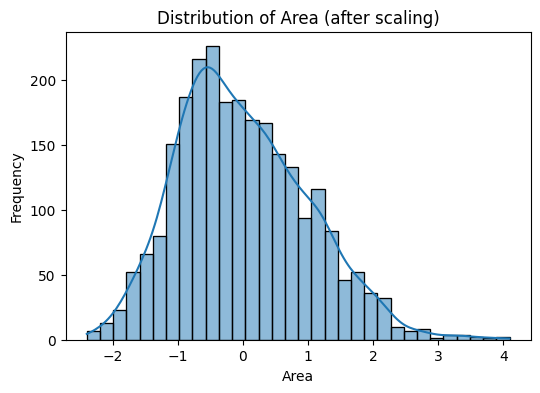

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.histplot(scaled_df["Area"], kde=True)
plt.title("Distribution of Area (after scaling)")
plt.xlabel("Area")
plt.ylabel("Frequency")
plt.show()


In [46]:
from sklearn.model_selection import train_test_split
X_final = scaled_df.drop("Class", axis=1)
y_final = scaled_df["Class"]
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.2, random_state=42)

In [47]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2000, 12), (500, 12), (2000,), (500,))

In [ ]:
from sklearn.svm import LinearSVC
LinSVC = LinearSVC(penalty='l2', C=10.0)
LinSVC.fit(X_train, y_train)


LinearSVC(C=10.0)

In [60]:
y_pred = LinSVC.predict(X_test)

In [61]:
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.874


In [67]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'max_iter': [1000, 5000, 10000],

}

linsvc = LinearSVC()
grid_search = GridSearchCV(linsvc, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Best Hyperparameters:", grid_search.best_params_)


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warni

Best Hyperparameters: {'C': 1, 'max_iter': 1000, 'penalty': 'l2'}


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [72]:
LinSVC = LinearSVC(penalty='l2', C=10.0, max_iter=1000)
LinSVC.fit(X_train, y_train)


LinearSVC(C=10.0)

In [73]:
y_pred = LinSVC.predict(X_test)
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.874


In [74]:
for C in [0.01, 0.1, 1, 10, 100, 1000]:
    model = LinearSVC(C=C, max_iter=5000, dual=False)
    model.fit(X_train, y_train)
    train_acc = accuracy_score(y_train, model.predict(X_train))
    test_acc = accuracy_score(y_test, model.predict(X_test))
    print(f"C={C} | Train Acc: {train_acc:.4f} | Test Acc: {test_acc:.4f}")

C=0.01 | Train Acc: 0.8815 | Test Acc: 0.8460
C=0.1 | Train Acc: 0.8835 | Test Acc: 0.8520
C=1 | Train Acc: 0.8875 | Test Acc: 0.8600
C=10 | Train Acc: 0.8855 | Test Acc: 0.8740
C=100 | Train Acc: 0.8865 | Test Acc: 0.8740
C=1000 | Train Acc: 0.8865 | Test Acc: 0.8820
